# Final Exam
## Jessica Kunkel

As usual, I start by running the shebang line, setting the working directory, importing the basic packages, and loading the data using `pd.read_csv`

In [1]:
#!/usr/bin/env python
""" Import display functions and create a function to print outputs to 
Markdown """

from IPython.display import display, Markdown
def printmd(string):
    display(Markdown(string))

In [2]:
""" Import the os module and set the working directory to where the 
mtcars.csv file is saved """

import os
path = r"C:\Users\jkunk\OneDrive\Documents\_SWENG Masters\9 DAAN 862 - Analytics Programming Python"
os.chdir(path)

In [3]:
""" Import NumPy, pandas, dataframe, Matplotlib """
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

In [4]:
""" Load data """

user = pd.read_csv('user_features.csv')
product = pd.read_csv('product_features.csv')
clicks = pd.read_csv('click_history.csv')

### Context
A website sent advertisements by email to users who are interested in their product. Your task is to find a good model to predict if an advertisement will be clicked with given datasets. 

## 1. Data Understanding
#### Explore the basic information of the datasets. 
### User Features

I started exploring the datasets one by one, starting with User Features.

In [5]:
""" Exploration of user_features.csv """
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   user_id                  12000 non-null  int64 
 1   number_of_clicks_before  11500 non-null  object
 2   ordered_before           12000 non-null  bool  
 3   personal_interests       12000 non-null  object
dtypes: bool(1), int64(1), object(2)
memory usage: 293.1+ KB


The user_features file has 12000 rows, with columns user_id (int), number_of_clicks_before (object), ordered_before (bool), and personal_interests (object). The number_of_clicks_before column has 500 null values, so this indicates a need for data cleaning. 

Since the only numerical column in the user data is the user_id, the `describe` statistics are not going to be useful in this case.

In [6]:
user.head()

,user_id,number_of_clicks_before,ordered_before,personal_interests
0,104939,2,True,"['body', 'makeup', 'nail', 'hand', 'foot', 'me..."
1,101562,2,True,"['men_skincare', 'men_fragrance', 'tools', 'sk..."
2,102343,2,True,"['tools', 'makeup', 'foot', 'nail']"
3,106728,5,True,"['hand', 'men_skincare']"
4,107179,0,True,"['makeup', 'body', 'skincare', 'foot', 'men_sk..."


Examining the first five rows of the dataframe, it appears as though the personal_interests attribute could align with product descriptions. I can also see that the number_of_clicks_before attribute, while it has a datatype of 'object', holds integer values. I will examine another selection of rows to confirm:

In [7]:
user[800:810]

,user_id,number_of_clicks_before,ordered_before,personal_interests
800,109747,5,False,"['makeup', 'fragrance', 'men_fragrance']"
801,109608,6+,True,"['makeup', 'fragrance', 'body', 'men_skincare']"
802,108754,6+,True,"['makeup', 'hair']"
803,107020,2,True,"['hand', 'makeup', 'fragrance', 'nail', 'body'..."
804,107454,6+,True,"['body', 'hand', 'hair', 'men_skincare', 'frag..."
805,103829,0,True,"['men_fragrance', 'foot', 'nail', 'men_skincar..."
806,101347,1,True,"['skincare', 'men_skincare', 'body']"
807,110617,5,True,"['nail', 'men_fragrance', 'tools', 'skincare',..."
808,100365,0,True,"['fragrance', 'body', 'men_fragrance', 'makeup..."
809,103031,2,True,"['fragrance', 'body', 'tools', 'hand', 'skinca..."


In [8]:
user[5050:5060]

,user_id,number_of_clicks_before,ordered_before,personal_interests
5050,105575,5,True,"['hand', 'foot', 'makeup', 'fragrance', 'hair'..."
5051,103054,1,True,['hair']
5052,107734,6+,False,"['tools', 'makeup', 'nail', 'fragrance', 'men_..."
5053,106470,0,True,"['men_skincare', 'men_fragrance', 'makeup', 'h..."
5054,101018,2,True,"['skincare', 'tools', 'men_fragrance', 'men_sk..."
5055,102529,2,False,"['fragrance', 'hand', 'body', 'tools', 'skinca..."
5056,110633,1,False,"['foot', 'skincare', 'makeup', 'hand']"
5057,105260,6+,True,"['hand', 'foot', 'men_skincare', 'fragrance', ..."
5058,103909,0,False,"['fragrance', 'hair', 'tools', 'foot', 'skinca..."
5059,105795,2,True,"['body', 'men_skincare', 'foot', 'skincare']"


I can see from the two additional data samples that numer_of_clicks_before is mostly comprised of integer values, with the exception of '6+'. 

Based on the type of data, I don't think there's value to generating a scatterplot matrix at this point, as the personal_interests column is comprised of many lists of product types, and would likely not show anything useful in a scatterplot at this point.

I am curious, however, if all of the user_id values are unique.

In [9]:
unique_users = user['user_id'].nunique()
printmd(f'There are {unique_users} unique user IDs.')

There are 12000 unique user IDs.

From the above, I can see that there are 12000 unique user IDs, and since there are 12000 rows in the dataframe, there are no repeated or duplicate users.

### Product Features

In [10]:
""" Exploration of product_features.csv """
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_id         1000 non-null   int64  
 1   category           1000 non-null   object 
 2   on_sale            1000 non-null   bool   
 3   number_of_reviews  1000 non-null   int64  
 4   avg_review_score   1000 non-null   float64
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 32.4+ KB


The product_features file has 1000 rows, and all the columns have 1000 non-null values (so there is no need for removing null values). The columns are product_id (int), category (object), on_same (bool), number_of_reviews (int), and avg_review_score (float). 

In [11]:
product.describe()

,product_id,number_of_reviews,avg_review_score
count,1000.000000,1.000000e+03,1000.000000
mean,1499.500000,1.157725e+05,2.660656
std,288.819436,5.028997e+05,1.741875
min,1000.000000,6.600000e+01,-1.000000
25%,1249.750000,2.570000e+02,1.428969
50%,1499.500000,4.710000e+02,2.769397
75%,1749.250000,7.042500e+02,4.180860
max,1999.000000,2.307390e+06,5.000000


The `describe` statistics aren't useful for the product_id column, but they do show the following for the other numerical columns:
- Products have a mean of 115,772.5 reviews, with a standard deviation of 502899.7, maximum of 2,307,390 reviews and minimum of 66 reviews
- Products have an average review score of 2.66, with a standard deviation of 1.74, maximum of 5, and minimum of -1

In [12]:
product.head()

,product_id,category,on_sale,number_of_reviews,avg_review_score
0,1134,tools,False,101,3.349452
1,1846,skincare,False,111,5.000000
2,1762,fragrance,False,220,4.882706
3,1254,hair,True,446,5.000000
4,1493,body,True,513,-1.000000


Examining the first 5 rows of the product dataframe, I can see that the category attribute contains string values similar to those that are listed in the personal_interests column in the user dataframe. I can also see that there may be some items with a negative review score, which may need to be removed to not skew any analysis. I'll take a look at another few samples of the product dataframe:

In [13]:
product[140:150]

,product_id,category,on_sale,number_of_reviews,avg_review_score
140,1964,makeup,True,223,2.214190
141,1332,skincare,False,171,3.621384
142,1361,body,True,662,-1.000000
143,1161,hair,True,632,2.450736
144,1991,foot,True,213,3.235882
145,1769,body,True,774,0.696350
146,1435,men_fragrance,False,386,4.519898
147,1960,foot,True,2306809,3.728535
148,1516,makeup,True,673,2.914212
149,1695,skincare,False,239,2.501659


Items to note in this example include row 142, which also has a negative review score, and row 147, which has an abnormally large number of reviews (2306809). This indicates that there are some outliers in the dataset that may need to be accounted for. 

In [14]:
product[780:790]

,product_id,category,on_sale,number_of_reviews,avg_review_score
780,1065,hand,True,102,5.000000
781,1558,hair,True,447,-1.000000
782,1281,foot,True,237,3.083948
783,1627,men_skincare,True,423,5.000000
784,1108,foot,True,752,1.292130
785,1458,men_fragrance,False,443,3.935804
786,1912,fragrance,False,458,0.979309
787,1194,foot,True,191,5.000000
788,1358,men_skincare,True,266,4.177233
789,1772,fragrance,False,769,0.779326


The next sample also shows a negative avg_review_score in row 781, and it seems like the average review scores tend to fall between 0 and 5.

I'll continue by looking at whether all the product_id values are unique, and seeing what possible values there are in the category column.

In [15]:
unique_products = product['product_id'].nunique()
printmd(f'There are {unique_products} unique products, and 1000 rows in the dataframe.')

There are 1000 unique products, and 1000 rows in the dataframe.

In [16]:
unique_categories = product['category'].unique()
n_unique_categories = product['category'].nunique()
printmd(f'There are {n_unique_categories} unique categories: {unique_categories}')

There are 11 unique categories: ['tools' 'skincare' 'fragrance' 'hair' 'body' 'foot' 'nail' 'makeup'
 'men_skincare' 'hand' 'men_fragrance']

As with the user data, I will wait until the data is joined together to view a scatterplot matrix.

In addition, to prepare to handle outliers, I wanted to see how many of the products had over 100,000 reviews

In [17]:
count_high_reviews = len(product[product['number_of_reviews'] > 100000])
printmd(f'Of the {unique_products} products, {count_high_reviews} of them have over 100,000 reviews. This comprises {count_high_reviews/unique_products*100}% of the products in the dataset.')

Of the 1000 products, 50 of them have over 100,000 reviews. This comprises 5.0% of the products in the dataset.

The high proporation of products with over 100,000 reviews made me think that maybe the extremely high values for 'number_of_reviews' may not be outliers, and may be extremely popular (or unpopular, depending on the review score) products.

I took this one step further to see what proportion of the dataset has a high number of reviews and a valid average review score (>0):

In [18]:
valid_high_reviews = len(product[(product['number_of_reviews'] > 100000) & (product['avg_review_score'] > 0)])
printmd(f'Of the {unique_products} products, {valid_high_reviews} of them have over 100,000 reviews AND have an average review score > 0. This comprises {valid_high_reviews/unique_products*100}% of the products in the dataset.')

Of the 1000 products, 48 of them have over 100,000 reviews AND have an average review score > 0. This comprises 4.8% of the products in the dataset.

From this exploration I decided that removing 4.8% of the product dataset may not be a good idea.

### Click History

In [19]:
""" Exploration of click_history.csv """
clicks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35990 entries, 0 to 35989
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   user_id     35990 non-null  int64
 1   product_id  35990 non-null  int64
 2   clicked     35990 non-null  bool 
dtypes: bool(1), int64(2)
memory usage: 597.6 KB


There are 35990 rows in the clicks dataframe, with no null values. The columns are user_id (int), product_id (int), and clicked. Knowing there are 12000 unique user IDs in the users data and 1000 unique product IDs in the products data, I want to find out if there are a different number of unique users and products listed in the clicks dataset.

Since the numerical columns in the clicks dataframe are the user_id and the product_id, the `describe` statistics aren't going to be useful in this case either.

In [20]:
clicks.head()

,user_id,product_id,clicked
0,104863,1350,False
1,108656,1321,True
2,100120,1110,False
3,104838,1443,True
4,107304,1397,True


The first five rows of the data do not give any indication to whether product or user IDs are repeated, but it does verify that the potential shared columns look similar to the user ID column in users and the product ID column in products.

In [21]:
n_unique_users = clicks['user_id'].nunique()
n_unique_products = clicks['product_id'].nunique()
printmd(f'There are {n_unique_users} unique users and {n_unique_products} unique products in the clicks dataset, compared to 12000 unique users in the user dataset and 1000 unique products in the product dataset.')

There are 7200 unique users and 1000 unique products in the clicks dataset, compared to 12000 unique users in the user dataset and 1000 unique products in the product dataset.

The clicks dataset has the same number of unique products as in the products dataset, but the IDs may not match up, so I will have to join the two datasets to only use the products that have click data. 

The clicks dataset has fewer unique users than in the user dataset, so I will have to join the two datasets to only use those users that are represented in the clicks dataset.

## 2. Data Cleaning and Preprocessing
#### Clean and preprocess the datasets (such as missing values, outliers, dummy, merging, etc.).

The overall goal of the assignment is to predict whether an advertisement will be clicked. I was not provided with the information that is in each advertisement, so I will go on the assumption that, in my experience, advertisements tend to not include information like the customer's average review, or the number of reviews. Advertisements, even for bad products, are trying to catch the attention of targeted users. Those users only find out more about the quality of the product AFTER clicking the ad or researching more on their own. 

On those grounds, I decided to limit the amount of data that I'll be handling, focusing on the user, the product, the product category, whether the product category matches the user's interests, and whether they clicked on the ad or not. This last column, 'clicked', is the dependent variable that the models will be trying to predict.

Furthermore, I'm going to limit my data cleaning and preprocessing to focus on relevant columns and joining the datasets in a more meaningful way. I'll convert the 'personal_interests' column into lists instead of strings to be able to match product categories and interests. I will also join the click data on the product_id and category from the products dataframe, excluding the 'on_sale', 'number_of_reviews', and 'avg_review_score' columns.

### Users Data

First, I processed the users dataframe to ensure the number_of_clicks_before column was of integer type.

In [22]:
""" Process number_of_clicks_before column from object with NaN values to cleaned integer type """
# replace inf and -inf with NaN
user = user.replace([np.inf, -np.inf], np.nan)
# drop all rows with NaN values
user = user.dropna()
# change 6+ values in number_of_clicks_before to 6
user.loc[user['number_of_clicks_before'] == '6+', 'number_of_clicks_before'] = 6
# change datatype of number_of_clicks_before column to integer
num_clicks = pd.to_numeric(user['number_of_clicks_before'], errors='coerce', downcast='integer')
# drop original number_of_clicks_before column
user_clicks = user.drop(columns='number_of_clicks_before')
# concatenate new number_of_clicks_before column and user dataframe
user_clicks = pd.concat([user_clicks, num_clicks], axis=1)
# show change in data type
user_clicks.info()
user_clicks.head()

<class 'pandas.core.frame.DataFrame'>
Index: 11500 entries, 0 to 11999
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   user_id                  11500 non-null  int64 
 1   ordered_before           11500 non-null  bool  
 2   personal_interests       11500 non-null  object
 3   number_of_clicks_before  11500 non-null  int8  
dtypes: bool(1), int64(1), int8(1), object(1)
memory usage: 292.0+ KB


,user_id,ordered_before,personal_interests,number_of_clicks_before
0,104939,True,"['body', 'makeup', 'nail', 'hand', 'foot', 'me...",2
1,101562,True,"['men_skincare', 'men_fragrance', 'tools', 'sk...",2
2,102343,True,"['tools', 'makeup', 'foot', 'nail']",2
3,106728,True,"['hand', 'men_skincare']",5
4,107179,True,"['makeup', 'body', 'skincare', 'foot', 'men_sk...",0


Next, I processed the ordered_before column from boolean to integer type using `get_dummies`, dropping the first column to avoid multicollinearity.

In [23]:
user_ordered = pd.get_dummies(user_clicks, drop_first=True, columns=['ordered_before'], dtype=int)
user_ordered.info()
user_ordered.head()

<class 'pandas.core.frame.DataFrame'>
Index: 11500 entries, 0 to 11999
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   user_id                  11500 non-null  int64 
 1   personal_interests       11500 non-null  object
 2   number_of_clicks_before  11500 non-null  int8  
 3   ordered_before_True      11500 non-null  int32 
dtypes: int32(1), int64(1), int8(1), object(1)
memory usage: 325.7+ KB


,user_id,personal_interests,number_of_clicks_before,ordered_before_True
0,104939,"['body', 'makeup', 'nail', 'hand', 'foot', 'me...",2,1
1,101562,"['men_skincare', 'men_fragrance', 'tools', 'sk...",2,1
2,102343,"['tools', 'makeup', 'foot', 'nail']",2,1
3,106728,"['hand', 'men_skincare']",5,1
4,107179,"['makeup', 'body', 'skincare', 'foot', 'men_sk...",0,1


Next, I used `ast` to process the 'personal_interests' column into a list instead of a string.

In [24]:
import ast

# convert columns stored as strings to lists
if isinstance(user_ordered['personal_interests'].iloc[0], str):
    user_ordered['personal_interests'] = user_ordered['personal_interests'].apply(ast.literal_eval)

user_ordered.head()

,user_id,personal_interests,number_of_clicks_before,ordered_before_True
0,104939,"[body, makeup, nail, hand, foot, men_fragrance...",2,1
1,101562,"[men_skincare, men_fragrance, tools, skincare,...",2,1
2,102343,"[tools, makeup, foot, nail]",2,1
3,106728,"[hand, men_skincare]",5,1
4,107179,"[makeup, body, skincare, foot, men_skincare, f...",0,1


So far, the users dataframe has been processed to convert the number_or_clicks_before and ordered_before columns to integer types, remove NaN and inf values, and convert any values '6+' in the number_of_clicks_before column to 6. The personal_interests column has also been converted from string values to list values.

### Clicks and Products Data

The next preprocessing task is to join click data with product categories and user preferences. The clicks and products dataframe don't contain null values, so I'll start by converting the test column, 'clicked', from boolean to integer.

In [25]:
clicks['clicked'] = clicks['clicked'].astype(int)
clicks.head()

,user_id,product_id,clicked
0,104863,1350,0
1,108656,1321,1
2,100120,1110,0
3,104838,1443,1
4,107304,1397,1


Next, I'll join the clicks data with the product categories.

In [26]:
# select only 'product_id', 'category' from products dataframe
products_reduced = product[['product_id', 'category']]

merge_clicks = pd.merge(clicks, products_reduced, on='product_id', how='inner')
merge_clicks.info()
merge_clicks.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35990 entries, 0 to 35989
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     35990 non-null  int64 
 1   product_id  35990 non-null  int64 
 2   clicked     35990 non-null  int32 
 3   category    35990 non-null  object
dtypes: int32(1), int64(2), object(1)
memory usage: 984.2+ KB


,user_id,product_id,clicked,category
0,104863,1350,0,nail
1,108656,1321,1,foot
2,100120,1110,0,hand
3,104838,1443,1,skincare
4,107304,1397,1,makeup


Then, I merge the clicks data with user data, explode the personal_interests column, and match whether the product in the clicks data matches the user's interests.

In [27]:
df_merge = merge_clicks.merge(user_ordered, on='user_id', how='left')
explode = df_merge.explode('personal_interests')
# Create match flag
explode['match_interests'] = explode['category'] == explode['personal_interests']

# Aggregate back to original shape with .any()
df_result = explode.groupby(['user_id', 'category', 'product_id', 'clicked'], as_index=False)['match_interests'].any()
df_result['match_interests'] = df_result['match_interests'].astype(int)

# reorder for classification evaluation
column_order = ['user_id', 'product_id', 'match_interests', 'clicked']
df_result = df_result[column_order]

df_result.info()
df_result

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35990 entries, 0 to 35989
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   user_id          35990 non-null  int64
 1   product_id       35990 non-null  int64
 2   match_interests  35990 non-null  int32
 3   clicked          35990 non-null  int32
dtypes: int32(2), int64(2)
memory usage: 843.6 KB


,user_id,product_id,match_interests,clicked
0,100001,1738,0,0
1,100001,1363,1,1
2,100001,1402,1,1
3,100001,1129,1,0
4,100001,1893,0,0
...,...,...,...,...
35985,111999,1594,0,0
35986,111999,1667,0,0
35987,111999,1895,0,0
35988,111999,1363,0,1


This gives a final dataframe that consists of the user ID, the product ID, whether the product matches the given user's interests, and whether the ad was clicked. This gives a simple relationship between whether a product matches a user's interests and whether it was clicked.

Now that the data has been processed, I decided to generate a correlation matrix and scatterplot matrix for the final dataframe.

Text(0.5, 0, 'Predicted label')

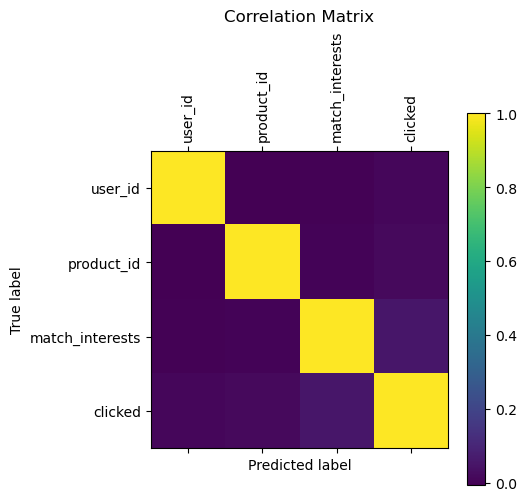

In [28]:
plt.matshow(df_result.corr())
plt.title('Correlation Matrix')
plt.colorbar()
plt.xticks(range(4), list(df_result.columns), rotation=90)
plt.yticks(range(4), list(df_result.columns))
plt.ylabel('True label')
plt.xlabel('Predicted label')

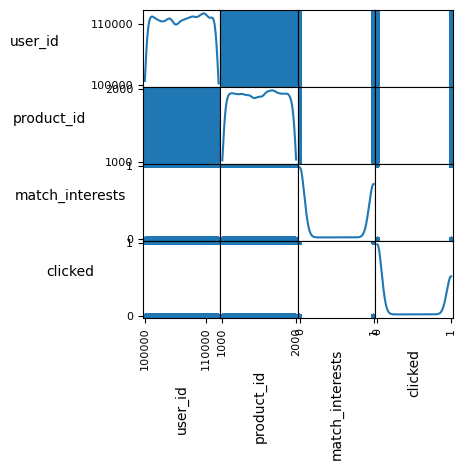

In [29]:
fig = pd.plotting.scatter_matrix(df_result, figsize=[4,4], diagonal='kde', alpha=0.7)
for ax in fig.ravel():
    ax.set_xlabel(ax.get_xlabel(), rotation=90, labelpad=10) 
    ax.set_ylabel(ax.get_ylabel(), rotation=0, labelpad=40)

plt.show()

At this point, I wondered if I should include the average reviews, on sale, and number of reviews data in the model data, since the correlation matrix and scatterplot matrix don't show much useful information based on solely categorical data. 

So, I went back to the product dataset and cleaned the on_sale, number_of_reviews, and avg_review_score columns.

### Cleaning additional Products columns, adding columns data to the model data

In [30]:
# change on_sale type from bool to int
product['on_sale'] = product['on_sale'].astype(int)

# remove products with review values less than 0
condition_to_drop = product['avg_review_score'] < 0
# Select rows where the condition is FALSE (i.e., keep rows where 'avg_review_score' is NOT less than 0)
product_filtered = product[~condition_to_drop]

product_filtered.head()

,product_id,category,on_sale,number_of_reviews,avg_review_score
0,1134,tools,0,101,3.349452
1,1846,skincare,0,111,5.000000
2,1762,fragrance,0,220,4.882706
3,1254,hair,1,446,5.000000
5,1447,foot,1,129,1.057940


In [31]:
# merge the cleaned products 
merge_products = pd.merge(df_result, product_filtered, on='product_id', how='inner')
merge_products.head()

,user_id,product_id,match_interests,clicked,category,on_sale,number_of_reviews,avg_review_score
0,100001,1738,0,0,fragrance,0,296,1.480831
1,100001,1363,1,1,hand,1,242,1.127813
2,100001,1402,1,1,hand,1,408,3.739738
3,100001,1129,1,0,makeup,1,165,4.357713
4,100001,1893,0,0,nail,0,525,2.488062


I will also re-include the number_of_clicks_before data from the users dataset.

In [32]:
# merge cleaned user data with cleaned product and clicks data
merge_final = pd.merge(merge_products, user_ordered, on='user_id', how='inner')

# set columns to keep
columns = ['user_id', 'product_id', 'on_sale', 'number_of_reviews', 'avg_review_score', 
           'number_of_clicks_before', 'ordered_before_True', 'match_interests', 'clicked']
# final dataframe with only columns to keep
df_final = merge_final[columns]
df_final.head()

,user_id,product_id,on_sale,number_of_reviews,avg_review_score,number_of_clicks_before,ordered_before_True,match_interests,clicked
0,100001,1738,0,296,1.480831,2,1,0,0
1,100001,1363,1,242,1.127813,2,1,1,1
2,100001,1402,1,408,3.739738,2,1,1,1
3,100001,1129,1,165,4.357713,2,1,1,0
4,100001,1893,0,525,2.488062,2,1,0,0


With this expanded dataframe, I plotted a correlation matrix and scatterplot matrix to see if there is any valuable information to be gained.

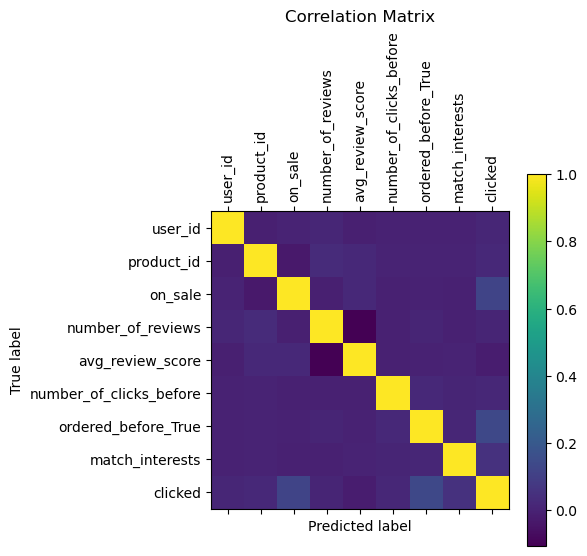

In [33]:
plt.matshow(df_final.corr())
plt.title('Correlation Matrix')
plt.colorbar()
plt.xticks(range(9), list(df_final.columns), rotation=90)
plt.yticks(range(9), list(df_final.columns))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

The correlation matrix doesn't show any incredibly high correlations, but there are a few minor correlations between an ad being clicked and whether a product is on sale, as well as whewther the user has ordered before.

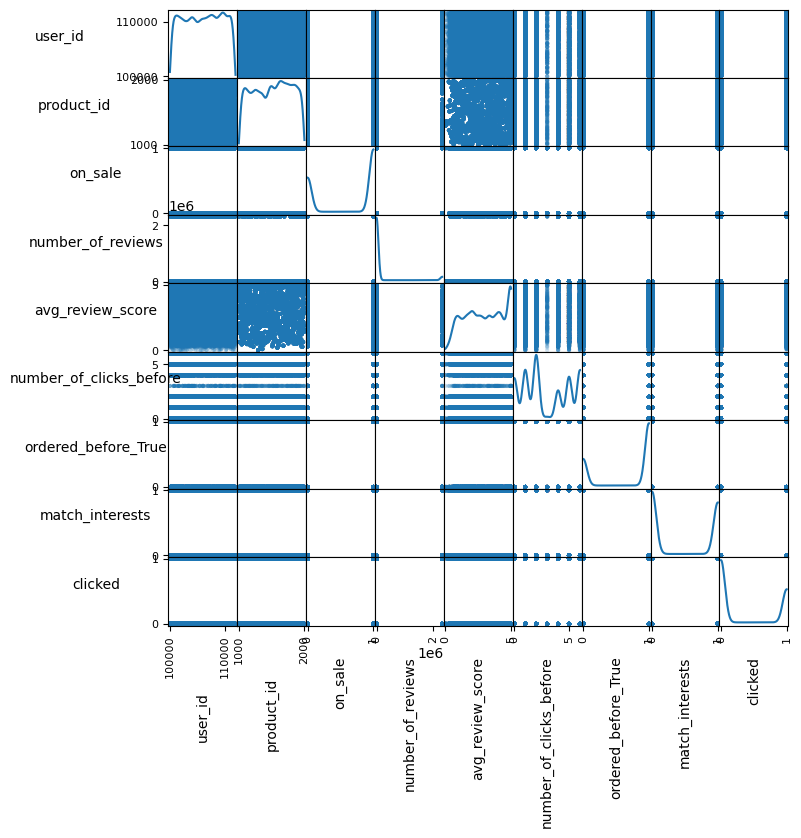

In [34]:
fig = pd.plotting.scatter_matrix(df_final, figsize=[8,8], diagonal='kde', alpha=0.2)
for ax in fig.ravel():
    ax.set_xlabel(ax.get_xlabel(), rotation=90, labelpad=10) 
    ax.set_ylabel(ax.get_ylabel(), rotation=0, labelpad=40)

plt.show()

From a visual evaluation of the scatterplot matrix, I do not see any trends since most of the data is categorical.

## 3. Model Generation and Evaluation
#### Please split the data into train and test sets with a ratio of 0.7:0.3. Build and optimize the classification models you learned in this course.

The classification models used in this course are as follows: Logistic Regression, Decision Tree, Naive Bayes, and Neural Network.

First, I split the data into the test and train sets, using a standard scaler to transform the data to a similar scale.

In [35]:
""" Use 30% of data as the test set: includes data preprocessing to ensure appropriate scale """
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve, auc

X = df_final.iloc[:, 0 : 7]
y = df_final.iloc[:, 8]

# Create a scaler object
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
X_scaled = scaler.fit_transform(X)

# Use 30% of the data as the test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

I also decided to initialize a few results dataframes for comparison of the models in question 4.

In [36]:
# confusion matrix scores structure will be Name, True neg, true pos, false neg, false pos
cm_scores = []

# classification scores structure will be name, accuracy, precision, f1, recall, ROC-AUC
cl_scores = []

### Logistic Regression
I generated the logistic regression model, plotted the confusion matrix, analyzed the classification report, and plotted the ROC-AUC curve.

In [37]:
from sklearn import linear_model

#Model generation
lr = linear_model.LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# predict the labels for training and test sets - model evaluation
lr_train_pred = lr.predict(X_train)
lr_test_pred = lr.predict(X_test)

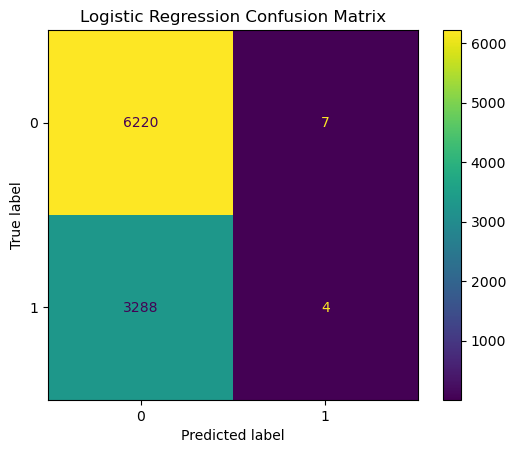

In [38]:
""" Confusion matrix """
test_cm = metrics.confusion_matrix(y_test, lr_test_pred)

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=test_cm)
disp.plot()
plt.title('Logistic Regression Confusion Matrix')
plt.show()

The confusion matrix shows a high number of true negatives (6220), but very few true positives (4). There is a small number of false positives (7), but a very high number of false negatives (3288). This indicates that the model is not very good at determining when a user will click on an ad, and actually takes a pessimistic view of whether a user will click on an ad.

In [39]:
"""append confusion matrix values for comparison"""
cm_scores.append(['Logistic Regression', 6220, 4, 3288, 7])

In [40]:
""" Generate classification report"""
print(metrics.classification_report(y_test, lr_test_pred))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79      6227
           1       0.36      0.00      0.00      3292

    accuracy                           0.65      9519
   macro avg       0.51      0.50      0.40      9519
weighted avg       0.55      0.65      0.52      9519



For the negative signal, precision was 0.65, recall was 1.0, and the f1-score was 0.79. For the positive signal, precision was 0.36, recall was 0.0, and the f1-score was 0.0. The accuracy was 0.65.

These values support the conclusion from the confusion matrix, that the logistic regression model does not perform well in determining when a user will click on an advertisement. It does perform marginally better in determining when a user will NOT click on an advertisement.

ROC-AUC  Score: 0.60

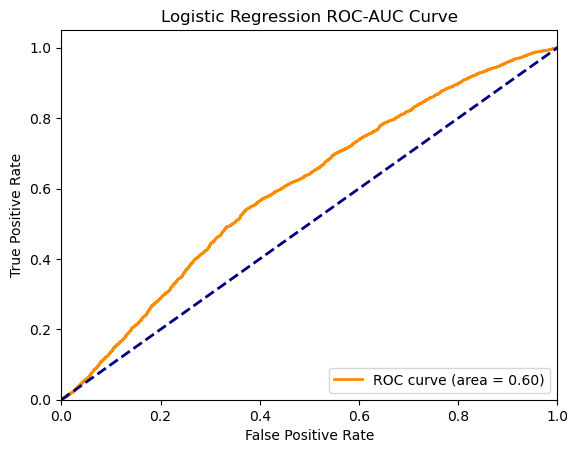

In [41]:
""" Generate ROC-AUC curve """
lr_test_probs = lr.predict_proba(X_test)[:, 1]

lr_roc_auc = roc_auc_score(y_test, lr_test_probs)
printmd(f"ROC-AUC  Score: {lr_roc_auc:.2f}")

# Plotting the ROC Curve
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, lr_test_probs)
lr_roc_auc = auc(lr_fpr, lr_tpr)

plt.figure()
plt.plot(lr_fpr, lr_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {lr_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC-AUC Curve')
plt.legend(loc="lower right")
plt.show()

The ROC curve and the ROC-AUC value being 0.6 indicate that the logistic regression model does not do a very good job at classifying whether a user will click on an advertisement.

In [42]:
"""append classification scores for comparison """
cl_scores.append(['Logistic Regression', 
                metrics.accuracy_score(y_test, lr_test_pred),
                metrics.precision_score(y_test, lr_test_pred),
                metrics.f1_score(y_test, lr_test_pred),
                metrics.recall_score(y_test, lr_test_pred),
                lr_roc_auc])

### Decision Tree
I generated the decision tree model, plotted the confusion matrix, analyzed the classification report, and plotted the ROC-AUC curve.

In [43]:
from sklearn import tree

# Model generation
DT = tree.DecisionTreeClassifier(max_depth=10, min_samples_split=5)
DT.fit(X_train, y_train)

# Model evaluation
DT_train_pred = DT.predict(X_train)
DT_test_pred = DT.predict(X_test)

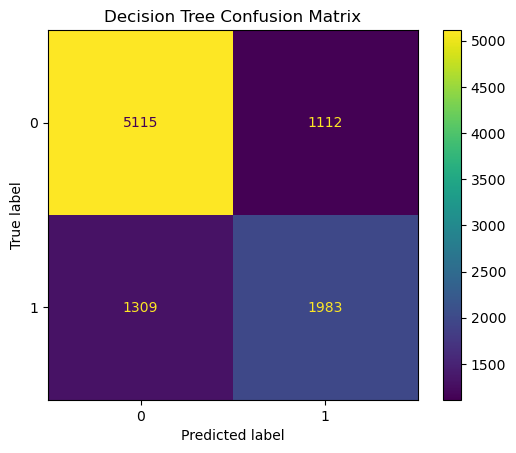

In [44]:
""" Confusion matrix """
test_cm = metrics.confusion_matrix(y_test, DT_test_pred)

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=test_cm)
disp.plot()
plt.title('Decision Tree Confusion Matrix')
plt.show()

The confusion matrix shows a high number of true negatives (5120), and a higher number of true positives (1985) than in the linear regression model. There are relatively similar numbers of false positives (1107) and false negatives (1307). This indicates that the decision tree model is better than the logistic regression model at determining when a user will click on an ad, but still gets the classification wrong a fair portion of the time.

In [45]:
"""append confusion matrix values for comparison"""
cm_scores.append(['Decision Tree', 5120, 1985, 1307, 1107])

In [46]:
""" Generate classification report"""
print(metrics.classification_report(y_test, DT_test_pred))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      6227
           1       0.64      0.60      0.62      3292

    accuracy                           0.75      9519
   macro avg       0.72      0.71      0.71      9519
weighted avg       0.74      0.75      0.74      9519



For the negative signal, precision was 0.80, recall was 0.82, and the f1-score was 0.81. For the positive signal, precision was 0.64 recall was 0.60, and the f1-score was 0.62. The accuracy was 0.75.

These values support the conclusion from the confusion matrix, that the decision tree model does okay in determining when a user will click on an advertisement, and pretty obviously performs better than the logistic regression model.

ROC-AUC Score: 0.78

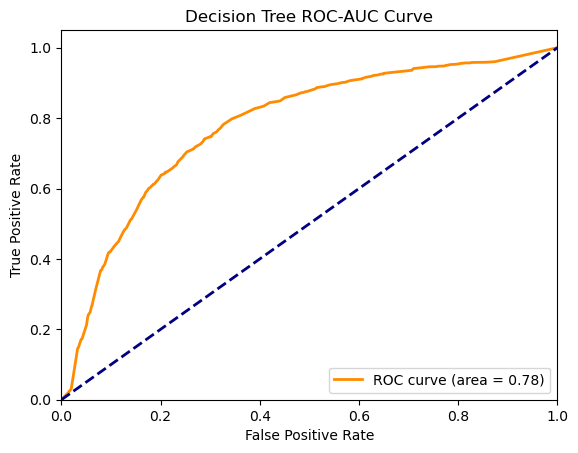

In [47]:
""" Generate ROC-AUC curve """
DT_test_probs = DT.predict_proba(X_test)[:, 1]

DT_roc_auc = roc_auc_score(y_test, DT_test_probs)
printmd(f"ROC-AUC Score: {DT_roc_auc:.2f}")

# Plotting the ROC Curve
DT_fpr, DT_tpr, DT_thresholds = roc_curve(y_test, DT_test_probs)
DT_roc_auc = auc(DT_fpr, DT_tpr)

plt.figure()
plt.plot(DT_fpr, DT_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {DT_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC-AUC Curve')
plt.legend(loc="lower right")
plt.show()

The ROC curve and the ROC-AUC value being 0.78 indicate that the decision tree model does relatively well at determining when a user will click on an advertisement, and performs better than the logistic regression model.

In [48]:
"""append classification scores for comparison """
cl_scores.append(['Decision Tree', 
                metrics.accuracy_score(y_test, DT_test_pred),
                metrics.precision_score(y_test, DT_test_pred),
                metrics.f1_score(y_test, DT_test_pred),
                metrics.recall_score(y_test, DT_test_pred),
                DT_roc_auc])

### Naive Bayes
I generated the naive Bayes model, plotted the confusion matrix, analyzed the classification report, and plotted the ROC-AUC curve.

In [49]:
from sklearn.naive_bayes import GaussianNB

# Model Generation
NB = GaussianNB()
NB.fit(X_train, y_train)

# Model evaluation
NB_train_pred = NB.predict(X_train)
NB_test_pred = NB.predict(X_test)

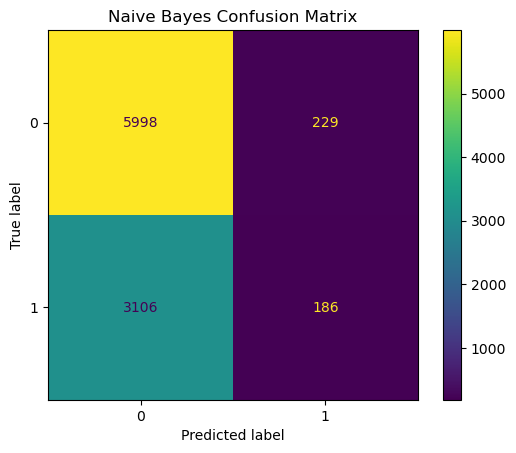

In [50]:
""" Confusion matrix """
test_cm = metrics.confusion_matrix(y_test, NB_test_pred)

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=test_cm)
disp.plot()
plt.title('Naive Bayes Confusion Matrix')
plt.show()

The confusion matrix shows a high number of true negatives (5998), but very fewer true positives (186) than expected. There are fewer false positives (229) than expected, but a very high number of false negatives (3106). This indicates that the Naive Bayes model may not be very good at determining when a user will click on an ad, and actually takes a pessimistic view of whether a user will click on an ad, similar to the logistic regression model.

In [51]:
"""append confusion matrix values for comparison"""
cm_scores.append(['Naive Bayes', 5998, 186, 3106, 229])

In [52]:
""" Generate classification report"""
print(metrics.classification_report(y_test, NB_test_pred))

              precision    recall  f1-score   support

           0       0.66      0.96      0.78      6227
           1       0.45      0.06      0.10      3292

    accuracy                           0.65      9519
   macro avg       0.55      0.51      0.44      9519
weighted avg       0.59      0.65      0.55      9519



For the negative signal, precision was 0.66, recall was 0.96, and the f1-score was 0.78. For the positive signal, precision was 0.45, recall was 0.06, and the f1-score was 0.10. The accuracy was 0.65.

These values support the conclusion from the confusion matrix, that the Naive Bayes model does not perform well in determining when a user will click on an advertisement. It does perform marginally better in determining when a user will NOT click on an advertisement. These results are similar to that of the Logistic Regression model, but the Naive Bayes performs slightly better in determining true positives.

ROC-AUC Score: 0.61

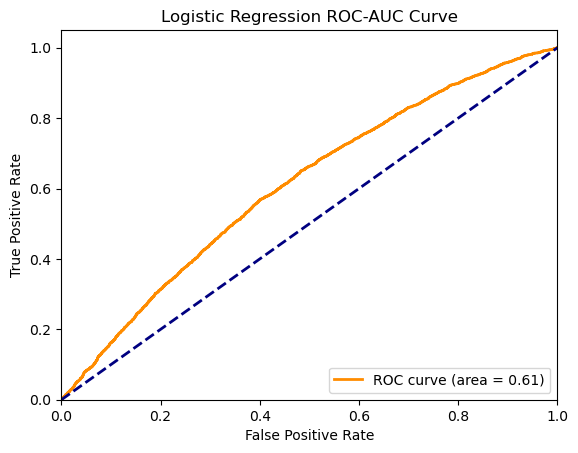

In [53]:
""" Generate ROC-AUC curve """
NB_test_probs = NB.predict_proba(X_test)[:, 1]

NB_roc_auc = roc_auc_score(y_test, NB_test_probs)
printmd(f"ROC-AUC Score: {NB_roc_auc:.2f}")

# Plotting the ROC Curve
NB_fpr, NB_tpr, NB_thresholds = roc_curve(y_test, NB_test_probs)
NB_roc_auc = auc(NB_fpr, NB_tpr)

plt.figure()
plt.plot(NB_fpr, NB_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {NB_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC-AUC Curve')
plt.legend(loc="lower right")
plt.show()

The ROC curve and the ROC-AUC value being 0.61 indicate that the Naive Bayes model does not do a very good job at classifying whether a user will click on an advertisement.

In [54]:
"""append classification scores for comparison """
cl_scores.append(['Naive Bayes', 
                metrics.accuracy_score(y_test, NB_test_pred),
                metrics.precision_score(y_test, NB_test_pred),
                metrics.f1_score(y_test, NB_test_pred),
                metrics.recall_score(y_test, NB_test_pred),
                lr_roc_auc])

### Neural Network
I generated the neural network model, plotted the confusion matrix, analyzed the classification report, and plotted the ROC-AUC curve. I also preprocessed the data with `MinMaxScaler` to ensure the data was in the range [0, 1].

In [55]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier

# data preprocessing
mmscaler = MinMaxScaler()

X_train_scaled = mmscaler.fit_transform(X_train)
X_test_scaled = mmscaler.transform(X_test)

# Model Generation
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10,4), random_state=42, max_iter=1000)
NN.fit(X_train_scaled, y_train)

# Model Evaluation
NN_train_pred = NN.predict(X_train_scaled)
NN_test_pred = NN.predict(X_test_scaled)

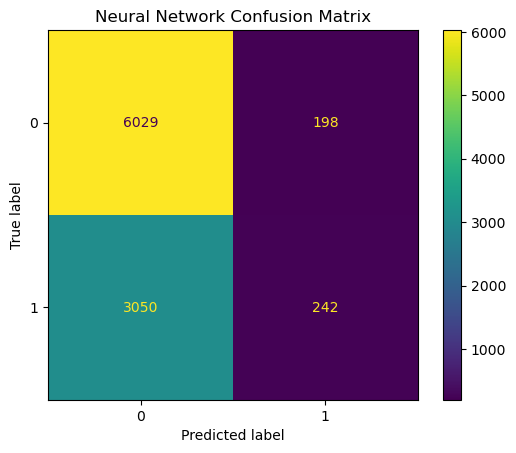

In [56]:
""" Confusion matrix """
test_cm = metrics.confusion_matrix(y_test, NN_test_pred)

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=test_cm)
disp.plot()
plt.title('Neural Network Confusion Matrix')
plt.show()

The confusion matrix shows a high number of true negatives (6029), but very fewer true positives (242) than expected. The number of false positives is also small (198), but the number of false negatives is very high (3050). This indicates that the neural network model may not be very good at determining when a user will click on an ad, and also takes a pessimistic view of whether a user will click on an ad. Surprisingly, this behavior is very similar to the logistic regression and Naive Bayes models.

In [57]:
"""append confusion matrix values for comparison"""
cm_scores.append(['Neural Network', 6029, 242, 3050, 198])

In [58]:
""" Generate classification report"""
print(metrics.classification_report(y_test, NN_test_pred))

              precision    recall  f1-score   support

           0       0.66      0.97      0.79      6227
           1       0.55      0.07      0.13      3292

    accuracy                           0.66      9519
   macro avg       0.61      0.52      0.46      9519
weighted avg       0.62      0.66      0.56      9519



For the negative signal, precision was 0.66, recall was 0.97, and the f1-score was 0.79. For the positive signal, precision was 0.55, recall was 0.07, and the f1-score was 0.13. The accuracy was 0.66.

These values support the conclusion from the confusion matrix, in that the neural network model does not perform well in determining when a user will click on an advertisement. It does perform marginally better in determining when a user will NOT click on an advertisement, and has only slightly better performance than the Logistic Regression and Naive Bayes models.

ROC-AUC Score: 0.83

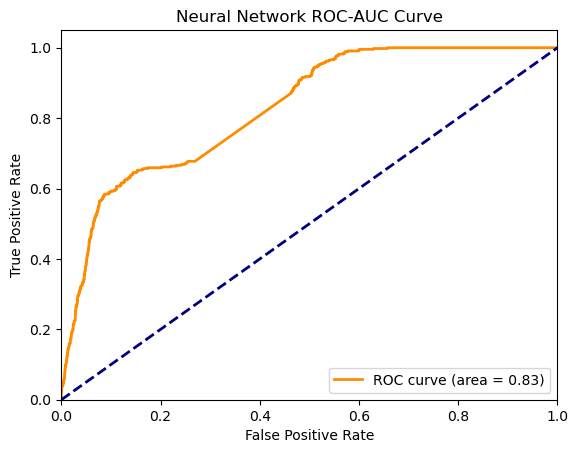

In [59]:
""" Generate ROC-AUC curve """
NN_test_probs = NN.predict_proba(X_test)[:, 1]

NN_roc_auc = roc_auc_score(NN_test_pred, NN_test_probs)
printmd(f"ROC-AUC Score: {NN_roc_auc:.2f}")

# Plotting the ROC Curve
NN_fpr, NN_tpr, NN_thresholds = roc_curve(NN_test_pred, NN_test_probs)
NN_roc_auc = auc(NN_fpr, NN_tpr)

plt.figure()
plt.plot(NN_fpr, NN_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {NN_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Neural Network ROC-AUC Curve')
plt.legend(loc="lower right")
plt.show()

Oddly, the ROC curve and the ROC-AUC value being 0.83 indicate that the Neural Network model does well when determining if a user will click on an advertisement. This does not align with the classification scores.

In [60]:
"""append classification scores for comparison """
cl_scores.append(['Neural Network', 
                metrics.accuracy_score(y_test, NN_test_pred),
                metrics.precision_score(y_test, NN_test_pred),
                metrics.f1_score(y_test, NN_test_pred),
                metrics.recall_score(y_test, NN_test_pred),
                NN_roc_auc])

## 4. Assessment and Evaluation
#### Which model has the best performance? What have you learned from the models you built?

In [61]:
cm_data_cols = ['Name', 'True Negatives', 'True Positives', 'False Negatives', 'False Positives']
cm_df = DataFrame(cm_scores, columns=cm_data_cols)
cm_df

,Name,True Negatives,True Positives,False Negatives,False Positives
0,Logistic Regression,6220,4,3288,7
1,Decision Tree,5120,1985,1307,1107
2,Naive Bayes,5998,186,3106,229
3,Neural Network,6029,242,3050,198


From the direct comparison of all four classification methods, it can be seen that the Decision Tree model has the highest number of True Positive classifications, while all the other models had much lower values for True Positive predictions; the Logistic Regression model performed especially poorly in this metric. However, the Decision Tree model also had a much higher number of False Positive classifications than the other models. In contrast, the number of True Negative predictions for the Decision Tree model was lower than the other models, indicating that the model is not as accurate in determining when a user will not click on the advertisement. The number of False Negative predictions, however, was also much smaller for the Decision Tree model, suggesting that the Decision Tree model does not take as pessimistic of an approach to classification as its counterparts.

The Naive Bayes and Neural Network models performed relatively similarly, with similar values in their confusion matrices. The Logistic Regression model was more dramatic in its positive predictions (when a user would be likely to click on an advertisement), both false and true.

In [62]:
cl_data_cols = ['Name', 'Accuracy', 'Precision', 'F1-Score', 'Recall', 'ROC-AUC Score']
cl_df = DataFrame(cl_scores, columns=cl_data_cols)
cl_df

,Name,Accuracy,Precision,F1-Score,Recall,ROC-AUC Score
0,Logistic Regression,0.653850,0.363636,0.002422,0.001215,0.599542
1,Decision Tree,0.745667,0.640711,0.620949,0.602369,0.780232
2,Naive Bayes,0.649648,0.448193,0.100351,0.056501,0.599542
3,Neural Network,0.658788,0.550000,0.129689,0.073512,0.827154


From the direct comparison of the accuracy, precision, F1-score, recall, and ROC-AUC score metrics, there is no clear winner for best performance on the dataset.

Based on accuracy, precision, F1-score, and recall, the Decision Tree model has the best performance. However, the Neural Network has a slighly better ROC-AUC score (0.827 vs 0.780). 

Taking all the performance data together, I would make the argument that **the Decision Tree model performs the best at determining when a user is likely to click on an advertisement** because it has the best scores in all metrics except ROC-AUC, and it has the greatest ability to classify true positive clicks, compared to the other classification models.